In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive"

 3dmodels.html
 3dmodels.js
 AHMEDABADhistory.html
'ai project.zip'
'Colab Notebooks'
'Contact Information.gform'
'Copy of eight.jpg'
'Copy of eleven.jpg'
'Copy of fifith.jpg'
'Copy of fifth.jpg'
'Copy of fifth.png'
'Copy of first.jpg'
'Copy of fourth.jpg'
'Copy of nine.jpg'
'Copy of second.jpg'
'Copy of seventh.jpg'
'Copy of sixth.jpg'
'Copy of tenth.jpg'
'Copy of third.jpg'
'Copy of tick.png'
'Copy of twelve.jpg'
'GATE MATERIALS'
 IMG-20241020-WA0011.jpg
 IMG-20241020-WA0012.jpg
 IMG-20241020-WA0013.jpg
 IMG-20241020-WA0014.jpg
 IMG-20241020-WA0015.jpg
 IMG-20241020-WA0016.jpg
 IMG-20241020-WA0017.jpg
 IMG-20241020-WA0018.jpg
 IMG-20241020-WA0019.jpg
 IMG-20241020-WA0020.jpg
 IMG-20241020-WA0021.jpg
 IMG-20241020-WA0022.jpg
 IMG-20241020-WA0023.jpg
 IMG-20241020-WA0024.jpg
 IMG-20241020-WA0025.jpg
 IMG-20241020-WA0026.jpg
 IMG-20241020-WA0027.jpg
 IMG-20241020-WA0028.jpg
 IMG-20241020-WA0029.jpg
 IMG-20241020-WA0030.jpg
 IMG-20241020-WA0031.jpg
 IMG-20241020-WA0032.jpg
 IMG-20241020-

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from os import listdir
from PIL import Image
from matplotlib.image import imread


# Scikit-learn preprocessing
from sklearn.preprocessing import label_binarize, LabelBinarizer
from sklearn.model_selection import train_test_split

# Keras / TensorFlow for deep learning
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential, model_from_json
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras.utils import to_categorical

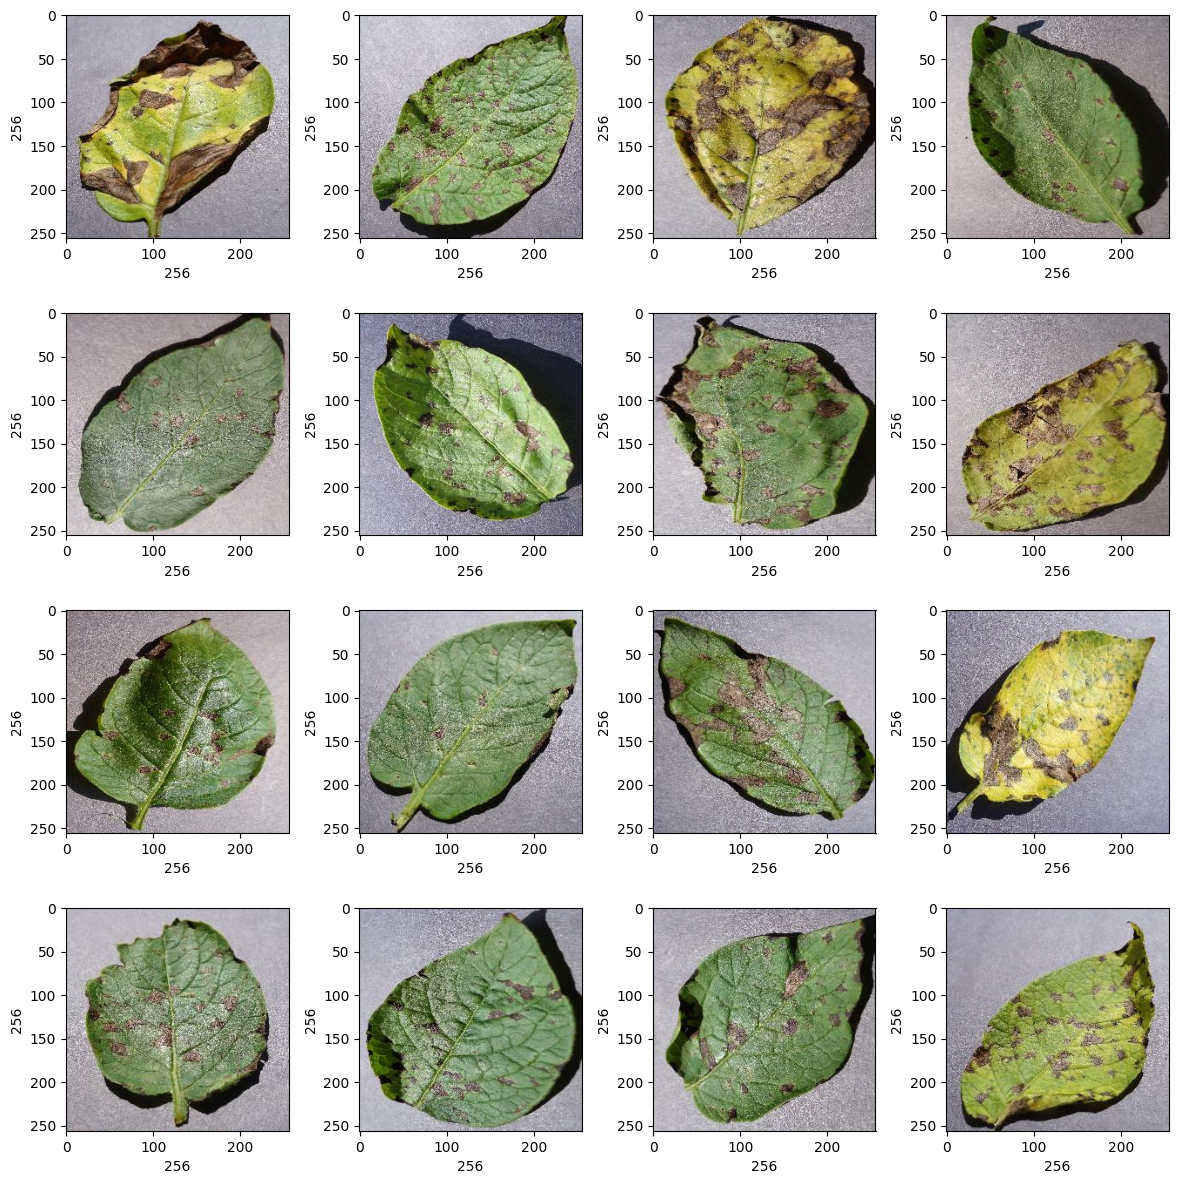

In [ ]:
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Plant_images_pianalytix/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
def convert_image_to_array(image_dir):
  try:
    image=cv2.imread(image_dir)
    if image is not None:
      image=cv2.resize(image,(250,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f"Error:  {e}")
    return None

In [ ]:
dir= "/content/drive/My Drive/Plant_images_pianalytix"
root_dir=listdir(dir)
image_list,label_list=[],[]
all_labels=[0,1,2]
binary_labels=[0,1,2]
temp=-1
for directory in root_dir:
  plant_image_list=listdir(f"{dir}/{directory}")
  temp+=1
  for files in plant_image_list:
    image_path=f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])


In [ ]:
label_counts=pd.DataFrame(label_list).value_counts()
label_counts.head()

,count
0,
0,300
1,300
2,300


In [ ]:
image_list[0].shape

(256, 250, 3)

In [ ]:
label_list=np.array(label_list)
label_list.shape

(900,)

In [ ]:
# Resize all images
image_list = [cv2.resize(img, (256, 256)) for img in image_list]

# Convert to array
image_list = np.array(image_list, dtype=np.float16) / 255.0  # use 255, not 225

# Split
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

# Now shape is already (N, 256, 256, 3), so no reshape needed
print(x_train.shape)  # should print (N, 256, 256, 3)


(720, 256, 256, 3)


In [ ]:
x_train=np.array(x_train,dtype=np.float16)/225.0
x_test=np.array(x_test,dtype=np.float16)/225.0
x_train=x_train.reshape(-1,256,256,3)
x_test=x_test.reshape(-1,256,256,3)

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)


In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",input_shape=(256,256,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112896)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     7,225,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,244,995 (27.64 MB)

 Trainable params: 7,244,995 (27.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(0.0001),metrics=['accuracy'])

In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2)

In [ ]:
epochs=50
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 9s/step - accuracy: 0.3456 - loss: 1.0972 - val_accuracy: 0.3333 - val_loss: 1.0914
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 83s 9s/step - accuracy: 0.3323 - loss: 1.0896 - val_accuracy: 0.3333 - val_loss: 1.0819
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 9s/step - accuracy: 0.3257 - loss: 1.0801 - val_accuracy: 0.3333 - val_loss: 1.0691
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 82s 9s/step - accuracy: 0.3332 - loss: 1.0659 - val_accuracy: 0.3472 - val_loss: 1.0525
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.3771 - loss: 1.0463 - val_accuracy: 0.4861 - val_loss: 1.0311
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.5265 - loss: 1.0249 - val_accuracy: 0.4306 - val_loss: 1.0056
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 80s 9s/step - accuracy: 0.4714 - loss: 0.9979 - val_accuracy: 0.6944 - val_loss: 0.9734
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 84s 9s/step - accuracy: 0.6285 - loss: 0.9672 - val_accuracy: 0.6111 - val_loss: 0.9363
Epoch 9/

In [ ]:
model.save("/content/drive/My Drive/plant_disease.h5")
# serialize model to json
json_model = model.to_json()
#save the model architecture to JSON file
with open('/content/drive/My Drive/plant_model.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
model.save_weights('/content/drive/My Drive/plant_model.weights.h5')


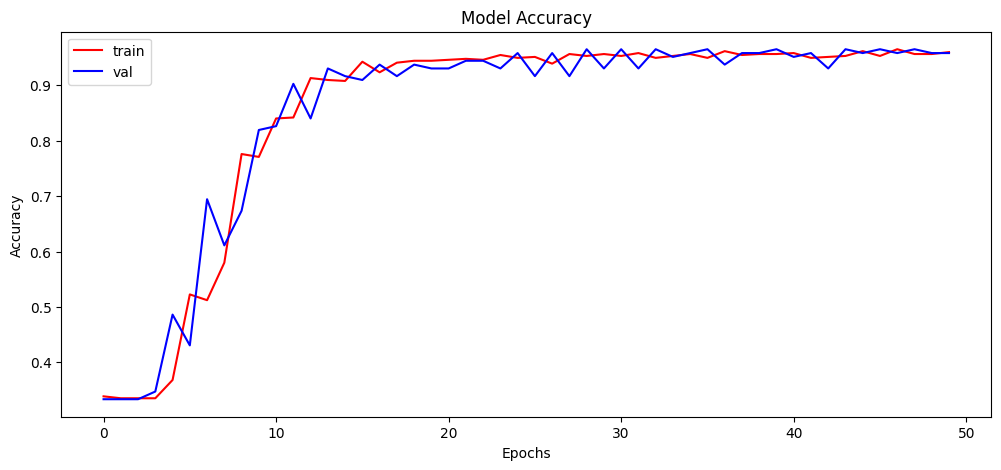

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()


In [ ]:
print("[INFO] Calculating Model Accuracy")
scores=model.evaluate(x_test,y_test)
print(f"Test Accuracy: {scores[1]*100}")


[INFO] Calculating Model Accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 821ms/step - accuracy: 0.9645 - loss: 0.1003
Test Accuracy: 95.55555582046509


In [ ]:
y_pred=model.predict(x_test)


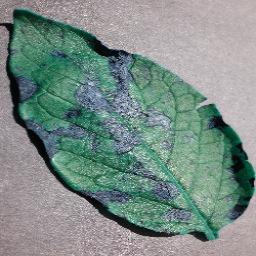

In [ ]:
img=array_to_img(x_test[10])
img

In [ ]:
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  1
Predicted :  1
